In [1]:
import pandas as pd
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

data = pd.read_csv('./data/DATASET.CSV')
print(f'{data.info()}')
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52702 entries, 0 to 52701
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  52686 non-null  object
 1   label   52702 non-null  object
dtypes: object(2)
memory usage: 823.6+ KB
None


,Review,label
0,"Great music service, the audio is high quality...",POSITIVE
1,Please ignore previous negative rating. This a...,POSITIVE
2,"This pop-up ""Get the best Spotify experience o...",NEGATIVE
3,Really buggy and terrible to use as of recently,NEGATIVE
4,Dear Spotify why do I get songs that I didn't ...,NEGATIVE
...,...,...
52697,Yes the best,POSITIVE
52698,Spotify won my heart in Feb 2024 You won my he...,POSITIVE
52699,I tried to open the app and it wont open I res...,POSITIVE
52700,Good,POSITIVE


In [2]:
print(f'NULL before claning: {data.isnull().sum()}\n')

data.dropna(subset=['Review'], inplace=True)

print(f'NULL after claning:{data.isnull().sum()}')

NULL before claning: Review    16
label      0
dtype: int64

NULL after claning:Review    0
label     0
dtype: int64


label
NEGATIVE    29423
POSITIVE    23263
Name: count, dtype: int64


<Axes: xlabel='label', ylabel='count'>

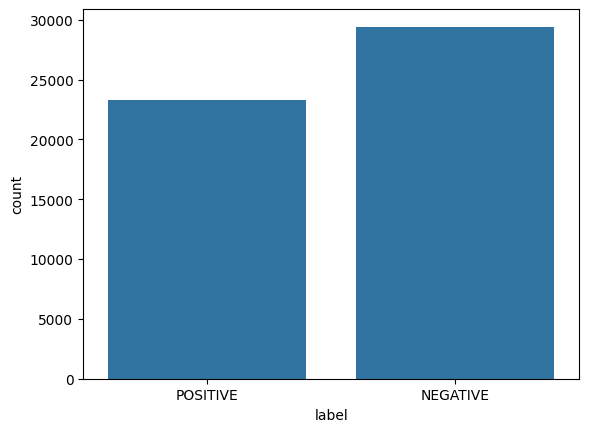

In [3]:
print(f'{data["label"].value_counts()}')
sns.countplot(data, x='label')

CLEANING

In [4]:
import re
print(f'{data.iloc[283, 0]}')

def pre_preparation(text: str) -> str:
    text = re.sub(r'Ã[\x80-\xBF]+', ' ', text) 
    text = re.sub(r'[^a-zA-Z\s]', ' ', text) 
    text = re.sub(r'\s+', ' ', text)
    text = text.strip()
    text = text.lower()
    return text

data['Review'] = data['Review'].apply(lambda x: pre_preparation(x))
print(f'{data.iloc[283, 0]}')

I really like a sound.....hello everyone...have a nice day....ðŸ˜ŽðŸ˜ŽðŸ˜Ž Stay safe...always god bless...ðŸ™ðŸ™ðŸ™
i really like a sound hello everyone have a nice day stay safe always god bless


In [5]:
import nltk
# nltk.download('all')
data['tokenized_review'] = data['Review'].apply(lambda x: nltk.word_tokenize(x))

In [6]:
def stopwords_removal(words: list) -> list:
    stop_words = stopwords.words('english')
    return [word for word in words if word not in stop_words]

filter_tokens = data['tokenized_review'].apply(lambda x: stopwords_removal(x))

if isinstance(filter_tokens[0], list):  
    cleaned_data = [" ".join(review) for review in filter_tokens]
cleaned_data[0]

'great music service audio high quality app easy use also quick friendly support'

In [7]:
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(cleaned_data).toarray()

print("TF-IDF vector for first review:", X[0])


non_zero_indices = X[0].nonzero()[0]  
non_zero_values = X[0][non_zero_indices] 

# Print the actual words corresponding to non-zero values
feature_names = tfidf.get_feature_names_out()
important_words = [(feature_names[i], non_zero_values[j]) for j, i in enumerate(non_zero_indices)]

print("\nNon-zero TF-IDF values for first review:")
for word, score in important_words:
    print(f"{word}: {score}")

TF-IDF vector for first review: [0. 0. 0. ... 0. 0. 0.]

Non-zero TF-IDF values for first review:
also: 0.22663774350458454
app: 0.10745828196785459
audio: 0.30850995501612105
easy: 0.2508358389724394
friendly: 0.36243502655321097
great: 0.1863341137968253
high: 0.36222277472572334
music: 0.12225117648138328
quality: 0.2660414981376143
quick: 0.4226712169816506
service: 0.26245950084187714
support: 0.3282731413738586
use: 0.20170156160715924


In [8]:
label_encoder = LabelEncoder()
labels = data['label'].values
encoded_labels = label_encoder.fit_transform(labels)